https://medium.com/@dawran6/twitter-scraper-tutorial-with-python-requests-beautifulsoup-and-selenium-part-1-8e76d62ffd68



Para fazer scraping vamos utilizar duas bibliotecas

- **Requests**: permite fazer requisições HTTP com muita facilidade
- **BeautifulSoup**: permite fazer o *parse* do HTML obtido facilmente

A biblioteca `requests` já faz parte da linguagem, mas a `BeautifulSoup` precisamos instalar. O comando abaixo instala usando o pip

```sh
pip install beautifulsoup4
```


In [115]:
import requests

from bs4 import BeautifulSoup

In [116]:
url=u"https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/eleitos-deputado-estadual-ce-quem-ganhou/"

#url=u"https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/eleitos-deputado-federal-ce-quem-ganhou/"


r=requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")

Ok, agora precisamos pensar em como achar a informação desejada. Olhando com a ferramenta de desenvolvimento do navegador (vamos chamar de "dev tools"), podemos verificar que o site utiliza uma tabela para listar os candidatos.

**Vamos achar o corpo dessa tabela com o BeautifulSoup** e pegar cada linha da tabela.

In [117]:
table_body = soup.find("tbody")

table_rows = table_body.find_all("tr")

Investigamos no dev tools, vemos que a primeira coluna de cada linha possui informações como **nome** do candidato, o **partido** e se ele foi **eleito**. Na segunda coluna há o **número de votos**, e a **porcentagem dos votos válidos**. Vamos pegar essas informações com o beautifulsoup.

Vamos começar tentando pegar o nome do candidato e se ele foi eleito.

In [118]:
r0 = table_rows[0]

nome = r0.find("h2").text.strip()
nome_quebrado = nome.split()
if nome_quebrado[-1] == "Eleito":
    nome_quebrado.pop()
    eleito = True
else:
    eleito = False
nome = " ".join(nome_quebrado)
print(nome)
print("Eleito: ", eleito)

André Fernandes
Eleito:  True


Agora vamos pegar o partido do candidato.

In [119]:
r0.find("span").text

'PSL'

Agora vamos pegar o número de votos.

In [120]:
votos = r0.find(class_="qtd-votos").text
print(votos)

109.742 votos


Precisamos limpar essa informação e transformar em um número.

In [121]:
int(votos.split()[0].replace(".", ""))

109742

Pronto. Temos tudo que precisamos. Vamos colocar tudo isso em uma função.

In [122]:
def pega_informacoes_do_candidato(table_row):
    """
    Retorna uma tupla com informações do candidado incluindo o nome, 
    se ele foi eleito, o partido, e seu número de votos.
    """
    nome = table_row.find("h2").text.strip()
    # Caso tenha sido eleito, a última palavra no nome será "Eleito"
    # Vamos checar isso e remover se necessário    
    nome_quebrado = nome.split()
    if nome_quebrado[-1] == "Eleito":
        nome_quebrado.pop()
        eleito = True
    else:
        eleito = False
    nome = " ".join(nome_quebrado)
    
    # Pega o partido do candidato
    partido = table_row.find("span").text
    
    # Pega o número de votos do candidato
    votos = table_row.find(class_="qtd-votos").text
    votos = int(votos.split()[0].replace(".", ""))
    
    return (nome, eleito, partido, votos)

Vamos testar nossa função.

In [123]:
print(pega_informacoes_do_candidato(table_rows[0]))
print(pega_informacoes_do_candidato(table_rows[10]))
print(pega_informacoes_do_candidato(table_rows[20]))
print(pega_informacoes_do_candidato(table_rows[50]))

('André Fernandes', True, 'PSL', 109742)
('Dr. Bruno Gonçalves', True, 'PATRI', 82515)
('Vitor Valim', True, 'PROS', 63642)
('Ferreira Aragão', False, 'PDT', 37094)


Agora podemos chamar nossa função em cada linha da tabela para pegar as informações de todos os candidados.

In [124]:
dados = []
for row in table_rows:
    dados.append(pega_informacoes_do_candidato(row))

## Analisando os dados

In [125]:
import pandas as pd

df = pd.DataFrame(data=dados, columns=["Nome", "Situação", "Partido", "Votos"])
df

,Nome,Situação,Partido,Votos
0,André Fernandes,True,PSL,109742
1,Queiroz Filho,True,PDT,103943
2,Sergio Aguiar,True,PDT,100925
3,Fernando Santana,True,PT,95665
4,Salmito,True,PDT,91293
5,Romeu Aldigueri,True,PDT,89060
6,Érika Amorim,True,PSD,86320
7,Moises Braz,True,PT,83489
8,Evandro Leitão,True,PDT,83486
9,Guilherme Landim,True,PDT,83215


In [126]:
df["Votos"].describe()

count       577.000000
mean       7287.400347
std       18154.989309
min           0.000000
25%         166.000000
50%         563.000000
75%        2783.000000
max      109742.000000
Name: Votos, dtype: float64

Vamos separar os candidatos em dois grupos, os eleitos e os não eleitos. Então podemos ver como os votos se distribuem.

In [127]:
df.groupby("Situação").describe()

Votos                                                          \
          count          mean           std      min       25%      50%   
Situação                                                                  
False     531.0   2579.263653   6083.057753      0.0    146.00    483.0   
True       46.0  61635.673913  22409.100324  24591.0  48959.25  60757.0   

                             
              75%       max  
Situação                     
False      1540.0   42955.0  
True      80918.5  109742.0

Como podemos ver, o menor candidato eleito conseguiu 24591 votos, enquanto que o candidato não eleito com maior número de votos conseguiu 42955 votos!

In [128]:
24591 / 42955

0.5724828308695146

Que tal vermos quantos votos cada partido obteve no total?

In [129]:
df.groupby("Partido").sum().sort_values(by="Votos", ascending=False).head(10)

,Situação,Votos
Partido,,
PDT,14.0,1225881
PT,4.0,335552
PATRI,3.0,328617
MDB,4.0,314524
PP,3.0,215727
PROS,2.0,188608
PC do B,2.0,183610
PSL,2.0,177274
PSDB,2.0,177084


Notem que a coluna "Situação", que é um boleano, na soma virou um número inteiro. Ao somarmos, temos o número de cadeiras que cada partido conseguiu!

O PDT sozinho pegou 14 cadeiras no Ceará. Provavelmente influência do Ciro, que é forte no Ceará.

Podemos facilmente plotar o número de cadeiras por partido.

Text(0,0.5,'Vagas')

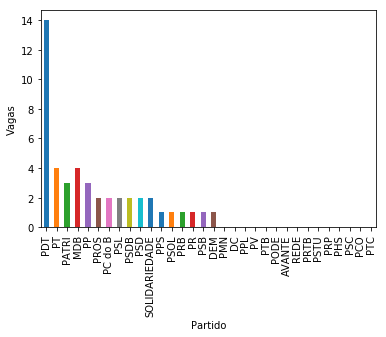

In [130]:
la = df.groupby("Partido").sum().sort_values(by="Votos", ascending=False)
#la.plot?
plot = la.plot(y=u"Situação", kind="bar", legend=False)
plot.set_ylabel("Vagas")

## Verificando o coeficiente eleitoral

Um fator importante na eleição para deputado é o coeficiente eleitoral, onde um candidado com muitos votos pode "puxar" vários outros. O caso mais emblemático foi o do Tiririca, que quando foi deputado federal por São Paulo acabou puxando outros cinco candidatos que não tinham expressiva contagem de votos.


Vamos verificar quantos deputados do PDT foram eleitos com menos votos que 42955 (o número de votos do condidato não eleito com maior número de votos).

In [131]:
df.query("Partido=='PDT' and Votos < 42955")

,Nome,Situação,Partido,Votos
47,Duquinha,False,PDT,42437
48,Oriel Nunes Filho,False,PDT,39474
50,Ferreira Aragão,False,PDT,37094
51,Adail Junior,False,PDT,36064
52,Josbertini,False,PDT,32823
121,Luciano Girao,False,PDT,3587
128,Dr. Roberto Sampaio,False,PDT,3329
148,Bruno Benevides,False,PDT,2611
195,Bruna Ribeiro Teles,False,PDT,1266
215,Daniel Romão,False,PDT,1019


Nenhum deputado do PDT foi puxado. E em quais partidos tivemos depudados puxados?

In [132]:
df.query("Votos < 42955 and Situação==True")

,Nome,Situação,Partido,Votos
37,Nelinho,True,PSDB,42779
38,Dr. Carlos Felipe,True,PC do B,35898
39,Walter Cavalcante,True,MDB,33160
40,Apóstolo Luiz Henrique,True,PATRI,31130
41,Acrisio Sena,True,PT,27842
42,Delegado Cavalcante,True,PSL,27112
43,Julinho,True,PPS,25769
44,Nizo,True,PATRI,24759
45,Soldado Noelio,True,PROS,24591


Quem foi o(s) puxador(es) de votos que elegeram "Soldado Noelio" com apenas 24591 votos?

In [133]:
df.query("Partido=='PROS' and Situação==True")

,Nome,Situação,Partido,Votos
20,Vitor Valim,True,PROS,63642
45,Soldado Noelio,True,PROS,24591


Caramba! Foi só o Vitor Valim e ele nem tem tantos votos assim.

## Determinando a porcentagem de mulheres eleitas


Esse problema é mais complicado pois nossa base de dados obtida do site não possui informação de gênero.

Por hora, podemos mostrar apenas os eleitos e contar manualmente.

In [152]:
# Número de eleitos
len(df.query("Situação==True"))

46

In [153]:
df.query("Situação==True")

,Nome,Situação,Partido,Votos
0,André Fernandes,True,PSL,109742
1,Queiroz Filho,True,PDT,103943
2,Sergio Aguiar,True,PDT,100925
3,Fernando Santana,True,PT,95665
4,Salmito,True,PDT,91293
5,Romeu Aldigueri,True,PDT,89060
6,Érika Amorim,True,PSD,86320
7,Moises Braz,True,PT,83489
8,Evandro Leitão,True,PDT,83486
9,Guilherme Landim,True,PDT,83215


Contando manualmente vemos que temos 7 mulheres.

In [157]:


print("Porcentagem de mulheres : {:.2f}%".format(100 * 7/46))

Porcentagem de mulheres : 15.22%


**E se não for possível contar manualmente?**

**E se quisermos pegar dados dos candidatos eleitos em cada estado e encontrar a porcentagem de mulheres eleitas?**

Nesse caso eu começaria procurando alguma base de dados de candidatos que contenha o gênero. Caso não ache, uma alternativa seria procurar uma base de dados de nomes no brasil contendo o gênero e procurar o primeiro nome de cada candidato nessa base de dados para determinar seu gênero. **O problema é que não necessáriamente o nome de todos os candidatos constaria nessa base de dados de nomes**.

Uma alternative seria treinar algum algorimo de aprendizagem de máquina com esses dados. Depois disso podemos utiliar o modelo treinado para classificar cada candidato eleito como masculino ou feminito para obter então a porcentagem de mulheres. **Claro que nesse caso erros podem ocorrer**, mas ainda assim teríamos uma boa ideia da porcentagem de mulheres eleitas.

# Notas Finais

Percebam que Python nos permite fazer muita coisa com grande facilidade. Tem bibliotecas pra praticamente tudo. Basta um pouco de dedicação pra aprender e algumas idéias pra tentar.


<div style="font-size: 3em; margin-top: 2em;">Idéias?</div>

Arquivo com nomes baixado de https://gabrielrb.net/2011/10/18/dados-prontos-em-formato-sql-e-csv/

In [134]:
nomes = pd.read_csv("TB_Nomes.csv", encoding='latin1', header=None, index_col=0)
nomes.columns = ["Nome", "Gênero"]

nomes.groupby("Gênero").count()

,Nome
Gênero,
F,713
M,2042


In [135]:
# nomes[nomes["Nome"].str.lower().str.contains("adao")]["Gênero"].iloc[0]

nomes_dict = {}
for idx, nome, genero in nomes.itertuples():
    nomes_dict[nome.strip().lower()] = genero